# Introduction

In this project we will analyze the results from an exit survey of the employees of DETE(Department of Education, Training and Employment) and TAFE(Technical and Further Education)

The questions we will try to answer are the following:
* What are the reasons of resignation of the employees that have been there for a short period of time? Is it due to some kind of dissatisfaction? What about the employees who have been there longer? 
* Is age a factor? Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In order to answer those questions we will have to combine the results of both surveys. 
Here is the description of some columns in the *dete_survey.csv*
 * **ID**: Id of the participant
 * **SeparationType**: Reason of employment termination
 * **Cease Date**: The year or Month the employment ended
 * **DETE Start Date**: The year the person began employment with DETE
    
Description of columns in the *tafe_survey.csv*
 * **Record ID**: Id of the participant
 * **Reason for ceasing employment**: Reason of employment termination
 * **LengthofServiceOverall. Overall Length of Service at Institute (in years)**: The length of the persons employment in years






In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

## Explore DETE survey

First let's explore the first dataset for nulls, frequencies and general information

In [2]:
print(dete_survey.info())
print(dete_survey.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey["SeparationType"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

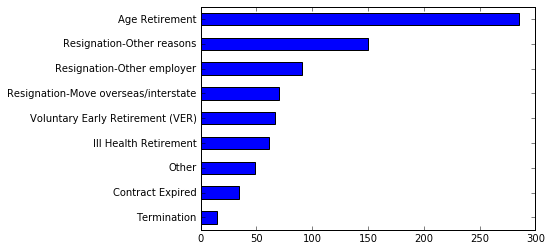

In [5]:
# Visualization of SeparationType
sep_type = dete_survey["SeparationType"].value_counts(ascending=True)
sep_type.plot(kind="barh", color="blue")

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
dete_survey.pivot_table(index="SeparationType"
                        , values=dete_survey.iloc[:,10:]
                        , aggfunc="count"
                       )

,Aboriginal,Age,Career Aspirations,Career move to private sector,Career move to public sector,Coach,Communication,Disability,Dissatisfaction with the department,Employment conditions,...,Stress and pressure support,Study/Travel,Torres Strait,Traumatic incident,Wellness programs,Work life balance,Work location,Worklife balance,Workload,Workplace issue
SeparationType,,,,,,,,,,,,,,,,,,,,,
Age Retirement,2,284,251,285,285,267,285,2,285,285,...,283,285,1,285,266,285,285,284,285,278
Contract Expired,2,34,30,34,34,31,33,2,34,34,...,33,34,1,34,31,34,34,34,34,32
Ill Health Retirement,1,59,57,61,61,57,61,8,61,61,...,60,61,0,61,57,61,61,60,61,61
Other,0,47,49,49,49,46,48,2,49,49,...,49,49,0,49,45,49,49,49,49,46
Resignation-Move overseas/interstate,2,67,65,70,70,64,69,0,70,70,...,68,70,0,70,62,70,70,69,70,63
Resignation-Other employer,2,91,84,91,91,83,89,0,91,91,...,89,91,0,91,87,91,91,90,91,86
Resignation-Other reasons,3,148,136,150,150,142,148,8,150,150,...,147,150,0,150,139,150,150,148,150,143
Termination,1,15,14,15,15,14,15,0,15,15,...,15,15,0,15,14,15,15,15,15,14
Voluntary Early Retirement (VER),3,66,60,67,67,63,66,1,67,67,...,66,67,1,67,65,67,67,66,67,65


**Observations for DETE**

We could separate the dataset columns in 3 main categories:
* The first 10 columns amd some of the last columns like age, contain mostly descriptive information about the survey participants. Their type is object/string
* The middle columns(11-28) are boolean survey questions for various topics
* The remaining columns are probably questions with answers on a likert scale of type object

Also, it's interesting to see above that the SeparationType column contains the reasons for the people leaving the organization. The graph above shows that Age Retirement is the most common reason.

A more general observation is that the dataset contains "Not Stated" values that indicate missing values, but are not stated as "NaN"

## Explore TAFE survey

In [8]:
print(tafe_survey.info())
print(tafe_survey.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [11]:
tafe_survey["Reason for ceasing employment"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

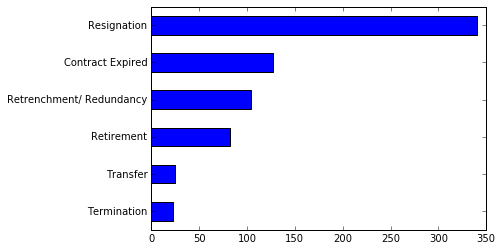

In [12]:
stop_reason = tafe_survey["Reason for ceasing employment"].value_counts(ascending=True)
stop_reason.plot(kind="barh", color="blue")

In [13]:
# Frequency table of LengthofServiceOverall
tafe_survey["LengthofServiceOverall. Overall Length of Service at Institute (in years)"].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

**Observations for TAFE**

This dataset is quite different than the DETE in terms of structure and types. 

* It does not contain any boolean fields. Instead it has 2 float(Record ID & CESSATION YEAR) and all the others are objects.
* The CESSATION YEAR which is our date field is in a different format compared to the DETE survey and will probably require some cleaning. Also we notice that there are there is n start_date field like in the DETE dataset. Instead there are two fields(LengthofServiceOverall) that could be used for the period of employment.
* The main reason for ceasing employment in this dataset is Resignation, which is not the case on the other dataset.

** General observations and next steps**
* Deal with NaN values(and 'Not Stated' in the dete dataframe)
* Drop unnecessary columns from both dataframes
* Each dataframe contains many of the same columns, but the column names are differerent



## Identify Missing Values and Drop Unneccessary Columns¶

In [14]:
# Read dete_survey again with 'Not Stated' as NaN
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [15]:
# Drop the unnecessary columns from both dataframes
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [16]:
print(dete_survey.shape)
print(dete_survey_updated.shape)
print(tafe_survey.shape)
print(tafe_survey_updated.shape)

(822, 56)
(822, 35)
(702, 72)
(702, 23)


In the previous cells we: 

* Read the dete_survey.csv again, but this time we replaced the "Not Stated" values with NaN for consistency
* Dropped the columns that are not useful for our analysis

## Clean column Names

We notice that each dataframe contains many of the same columns but with different column names. The goal here is to standarize the names in both dataframes so we can eventually combine them.

In [17]:
# Rename the columns in the dete_survey_updated dataframe
dete_survey_updated.columns = (dete_survey_updated.columns
                              .str.lower()
                              .str.strip()
                              .str.replace(" ","_")
                              )
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [18]:
# Rename columns in the tafe_survey_updated
new_names = {'Record ID': 'id',
             'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separationtype',
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(columns=new_names)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data

In [19]:
# Find unique values of the separationtype column in dete_survey_updated
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
# Find unique values of the separationtype column in tafe_survey_updated
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
# Get only the rows that contain "Resignation" and assign to new dataframe
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")]

In [22]:
# Get only the rows that contain "Resignation" and assign to new dataframe
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation", na=False)]

## Verify the data

** dete_resignations - cease_date **

In [23]:
# View unique values in the cease_date of dete_resignations dataframe
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [24]:
# Extract the years and convert them to a float type
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

** dete_resignations - dete_start_date **

In [26]:
# View unique values in the dete_start_date of dete_resignations dataframe
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [27]:
# View unique values in the cease_date of tafe_resignations dataframe
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In the above cells we checked the date columns in both dataframes.
The main findings are:
* There are no "extreme" or obviously wrong dates contained in the dataframes, so we leave them as is.
* The dates that exist in the dataframes don't align completely. For example the tafe_resignations dataframe contains the year 2009 while the dete_resignations does not. This is not a problem though since we are not interested in analyzing the results by year.

## Create a new column

In order to complete the analysis and answer the question we have as a goal we will have to compute the *years of service* for both dataframes.
For the tafe dataframe we already have this information stored in the column institute_service. We will have to create the same column in the dete dataframe. To do that we will use the cease_date and the dete_start_date columns.

In [28]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

* True: indicates a person resigned because they were dissatisfied in some way
* False: indicates a person resigned because of a reason other than dissatisfaction with the job
* NaN: indicates the value is missing

In [29]:
# Check the unique values
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
# Check the unique values
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False) 

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    162
True     149
Name: dissatisfied, dtype: int64

## Combine the Data

Now we will combine the two dataframes and add a new column in each dataframe - institute -  that will allow us to separate the two. We will also drop columns with less than 500 non-null values.

In [33]:
# Add a new column in the dete_resignations_up dataframe containing the DETE value
dete_resignations_up["institute"] = "DETE"
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [34]:
# Add a new column in the tafe_resignations_up dataframe containing the TAFE value
tafe_resignations_up["institute"] = "TAFE"
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [35]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [36]:
# Find notnull values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [37]:
# Drop columns that have less than 500 non-null values
combined_updated = combined.dropna(thresh=500, axis =1).copy()
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


## Clean the Service Column

As we see in the below cell, the institute_service column, has values in different formats which will make further analysis difficult. We will create buckets out of these values to help us in the analysis.

The categories will be the following:
* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

In [38]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [39]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [40]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Initial Analysis

Finally, we'll replace the missing values in the dissatisfied column. 
Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

In [41]:
# Verify unique values
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
# Replace NaN values
combined_updated["dissatisfied"].fillna(True, inplace=True)

In [43]:
# Create pivot table and calculate the percentage of employees that resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index="service_cat", values="dissatisfied")

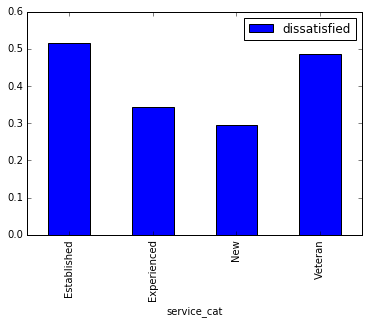

In [44]:
# Plot
dis_pct.plot(kind="bar")

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

## Additional Analysis
** Clean the age column**

In [45]:
# Check unique values frequencies in age column
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [46]:
# Extract years from age column and convert to float
combined_updated["age"] = combined_updated["age"].astype("str").str.extract(r"(\d+)")
combined_updated["age"] = combined_updated["age"].astype("float")

# Check updated unique values
combined_updated["age"].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age, dtype: int64

**Create age_group buckets**

In [47]:
# Convert age to buckets/categories
def transform_age(val):
    if val >= 18 and val < 25:
        return "18-24"
    elif val >= 25 and val < 35:
        return "25-34"
    elif val >= 35 and val < 45:
        return "35-44"
    elif val >=45 and val < 55:
        return "45-54"
    elif val >= 55 and val < 65:
        return "55-64"
    else:
        return "65+"

# Apply transform_age to the age column and create new column age_groups    
combined_updated["age_groups"] = combined_updated["age"].apply(transform_age)

# Check buckets in the new column
combined_updated["age_groups"].value_counts(dropna =False)

35-44    166
45-54    152
25-34    128
55-64     78
18-24     72
65+       55
Name: age_groups, dtype: int64

**Analyze**

In [48]:
# Create pivot table
dis_age_group = combined_updated.pivot_table(index="age_groups", values="dissatisfied")

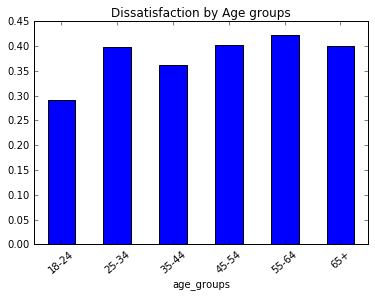

In [49]:
# Plot
dis_age_group.plot(kind="bar", rot=40, legend=False, title="Dissatisfaction by Age groups")

## Impute missing values in the institute_service_up column

In the cells below we will impute the missing values in the *institute_service_up* column with the mean per *position*.

In [50]:
# Find the mean years in service per position
mean_pos = combined_updated.groupby("position")["institute_service_up"].mean()
print(mean_pos)

position
Administration (AO)                                         3.094595
Business Service Manager                                   15.000000
Cleaner                                                     7.323529
Executive (SES/SO)                                          2.000000
Guidance Officer                                           17.333333
Head of Curriculum/Head of Special Education               18.600000
Operational (OO)                                            3.307692
Other                                                      12.000000
Professional Officer                                        3.500000
Professional Officer (PO)                                   5.562500
Public Servant                                              6.148148
School Administrative Staff                                 5.666667
School Based Professional Staff (Therapist, nurse, etc)     8.000000
Schools Officer                                             6.000000
Teacher                  

In [51]:
# Test selecting one row from above series mean_pos
mean_pos.loc[mean_pos.index=='Cleaner']

position
Cleaner    7.323529
Name: institute_service_up, dtype: float64

**Vectorized approach**

First we use the vectorized approach to complete the task in the below cell

In [52]:
# Create new column "institute_service_up_filled" containing the imputed values and then check
combined_updated['institute_service_up_filled'] = combined_updated.groupby('position')['institute_service_up'].apply(lambda x: x.fillna(x.mean()))
combined_updated[['position', 'institute_service_up', 'institute_service_up_filled']].head(1000)

,position,institute_service_up,institute_service_up_filled
0,Teacher,7.0,7.000000
1,Guidance Officer,18.0,18.000000
2,Teacher,3.0,3.000000
3,Teacher Aide,15.0,15.000000
4,Teacher,3.0,3.000000
5,Teacher,14.0,14.000000
6,Teacher,5.0,5.000000
7,Teacher Aide,NaN,8.780000
8,Teacher,30.0,30.000000
9,Cleaner,32.0,32.000000


In [53]:
# Check unique values in institute_service_up_filled column
combined_updated["institute_service_up_filled"].value_counts(dropna=False)

 1.000000     158
 3.000000      83
 5.000000      56
NaN            53
 7.000000      34
 11.000000     30
 0.000000      20
 6.000000      18
 20.000000     17
 4.000000      16
 2.000000      14
 9.000000      14
 12.637931     13
 8.780000      13
 13.000000      8
 8.000000       7
 15.000000      7
 12.000000      7
 14.000000      6
 17.000000      6
 10.000000      6
 22.000000      6
 16.000000      5
 7.323529       5
 18.000000      5
 23.000000      4
 24.000000      4
 21.000000      3
 19.000000      3
 32.000000      3
 39.000000      3
 6.148148       3
 30.000000      2
 25.000000      2
 28.000000      2
 26.000000      2
 5.666667       2
 29.000000      1
 35.000000      1
 38.000000      1
 36.000000      1
 33.000000      1
 49.000000      1
 34.000000      1
 41.000000      1
 27.000000      1
 42.000000      1
 31.000000      1
Name: institute_service_up_filled, dtype: int64

**For loop approach**

In [54]:
# df = combined_updated.copy()

# for pos in list(mean_pos.index):
#     df.loc[df.position==pos, 'institute_service_up'] = mean_pos.loc[mean_pos.index==pos][0] 

## Impute institute_service_up_filled remaining missing values

We succesfully imputed missing values based on the position column in the previous cells. Despite that, we still have 55 missing values in the insitute_service_up_filled column as the position column that we used has also some missing values.

The next step to completely fill the insitute_service_up_filled column is to use the mean of said column to impute the remaining missing values.

In [55]:
# Fill missing values with the meam of the column in the new column institute_service_up_filled_final
combined_updated["institute_service_up_filled_final"] = combined_updated["institute_service_up_filled"].fillna(combined_updated["institute_service_up_filled"].mean())
combined_updated.head(1000)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat,age_groups,institute_service_up_filled,institute_service_up_filled_final
0,36.0,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation-Other reasons,7.0,Established,35-44,7.000000,7.000000
1,41.0,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation-Other reasons,18.0,Veteran,35-44,18.000000,18.000000
2,31.0,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation-Other reasons,3.0,Experienced,25-34,3.000000,3.000000
3,46.0,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation-Other employer,15.0,Veteran,45-54,15.000000,15.000000
4,31.0,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation-Move overseas/interstate,3.0,Experienced,25-34,3.000000,3.000000
5,36.0,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation-Other reasons,14.0,Veteran,35-44,14.000000,14.000000
6,31.0,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation-Other employer,5.0,Experienced,25-34,5.000000,5.000000
7,61.0,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons,NaN,NaN,55-64,8.780000,8.780000
8,56.0,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation-Other employer,30.0,Veteran,55-64,30.000000,30.000000
9,51.0,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation-Other reasons,32.0,Veteran,45-54,32.000000,32.000000


In [56]:
# Check unique values in the new column
combined_updated["institute_service_up_filled_final"].value_counts(dropna=False)

1.000000     158
3.000000      83
5.000000      56
7.185332      53
7.000000      34
11.000000     30
0.000000      20
6.000000      18
20.000000     17
4.000000      16
9.000000      14
2.000000      14
8.780000      13
12.637931     13
13.000000      8
12.000000      7
15.000000      7
8.000000       7
14.000000      6
22.000000      6
10.000000      6
17.000000      6
18.000000      5
16.000000      5
7.323529       5
23.000000      4
24.000000      4
21.000000      3
6.148148       3
19.000000      3
32.000000      3
39.000000      3
25.000000      2
30.000000      2
5.666667       2
28.000000      2
26.000000      2
49.000000      1
41.000000      1
35.000000      1
42.000000      1
38.000000      1
36.000000      1
29.000000      1
34.000000      1
31.000000      1
33.000000      1
27.000000      1
Name: institute_service_up_filled_final, dtype: int64

We succesfully imputed all missing values in the institute_service_up column with the final column being *institute_service_up_filled_final*.